In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("MukeshDataset.xlsx")


,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_2,CA_3,CA_4,Weight,ScholarType,Direction,CourseType,Gender,Medium,ProgramType
0,318192,7751776776,WVODHY88,E,59.0,9.0,9.0,NaN,84.0,Bachelor of Technology (Computer Science and E...,...,15.0,7.0,5.0,62,Hostler,North,Theory,Male,English,UG
1,318192,7751776776,WVODHY89,C,74.0,NaN,NaN,35.0,70.0,Bachelor of Technology (Computer Science and E...,...,3.0,10.0,7.0,62,Hostler,North,Theory,Male,English,UG
2,418192,7753776776,VISJTC541,O,NaN,NaN,NaN,89.0,NaN,Bachelor of Technology in Computer Science and...,...,NaN,NaN,NaN,97,Hostler,North,Practical,Male,English,UG
3,418192,7754776776,VISJTC322,E,25.0,22.0,20.0,NaN,98.0,Bachelor of Technology in Computer Science and...,...,19.0,3.0,3.0,87,Hostler,East,Theory,Female,English,UG
4,418192,7754776776,VISJTC323,B+,80.0,NaN,NaN,44.0,100.0,Bachelor of Technology in Computer Science and...,...,22.0,1.0,14.0,87,Hostler,East,Theory,Female,English,UG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,318192,8138776776,REUBCS600,O,83.0,40.0,90.0,NaN,100.0,Bachelor of Architecture,...,14.0,4.0,9.0,64,Hostler,South,Theory,Female,Regional,UG
1645,318192,8138776776,REUBCS601,O,75.0,42.0,73.0,NaN,98.0,Bachelor of Architecture,...,12.0,5.0,1.0,64,Hostler,South,Theory,Female,Regional,UG
1646,318192,8138776776,REUBCS602,O,75.0,47.0,78.0,NaN,100.0,Bachelor of Architecture,...,1.0,3.0,9.0,64,Hostler,South,Theory,Female,Regional,UG
1647,318192,8138776776,REUBCS603,A,63.0,NaN,NaN,80.0,100.0,Bachelor of Architecture,...,0.0,0.0,2.0,64,Hostler,South,Theory,Female,Regional,UG


In [4]:
reg_no = df[['Regd No']].drop_duplicates()
mhrd = df[['MHRDName']].drop_duplicates()
courses = df[['Course']].drop_duplicates()

In [244]:
reg_no,mhrd.count(),courses

(         Regd No
 0     7751776776
 2     7753776776
 3     7754776776
 6     7755776776
 9     7756776776
 ...          ...
 1618  8133776776
 1629  8135776776
 1630  8136776776
 1631  8137776776
 1640  8138776776
 
 [257 rows x 1 columns], MHRDName    48
 dtype: int64,          Course
 0      WVODHY88
 1      WVODHY89
 2     VISJTC541
 3     VISJTC322
 4     VISJTC323
 ...         ...
 1624  FDNPLU192
 1625   FDNPLU38
 1626   FDNPLU39
 1627  FDNPLU449
 1628  FDNPLU533
 
 [753 rows x 1 columns])

([<matplotlib.patches.Wedge at 0x250c7004988>,
 [Text(1.0913950573561215, 0.13732016887052031, 'Practical Courses'),
  Text(-1.0913950573561215, -0.13732016887052037, 'Theoretical Courses')],
 [Text(0.5953063949215208, 0.07490191029301108, '3.98'),
  Text(-0.5953063949215208, -0.0749019102930111, '96.02')])

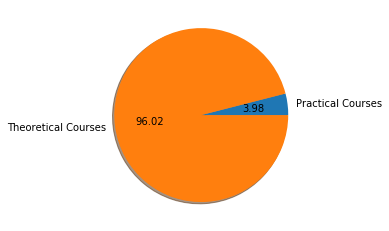

In [246]:
ctype = df[['Course','CourseType']].drop_duplicates(subset='Course')
ctype

theory = ctype[ctype['CourseType'].eq('Theory')]
practical = ctype[ctype['CourseType'].eq('Practical')]
theory.dropna()
practical.dropna()


prac = practical.count()
theo = theory.count()
prac,theo
plt.pie((prac['Course'],theo['Course']),labels=['Practical Courses','Theoretical Courses'],autopct='%.2f',shadow=True)

([<matplotlib.patches.Wedge at 0x250c718fb08>,
 [Text(-0.033610930578962334, 1.099486382519409, 'Day Scholars'),
  Text(0.03361082763761719, -1.0994863856662866, 'Hostelers')],
 [Text(-0.01833323486125218, 0.5997198450105867, '50.97'),
  Text(0.018333178711427554, -0.5997198467270654, '49.03')])

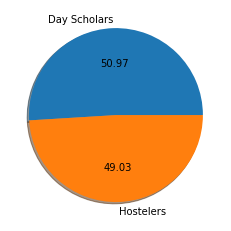

In [250]:
scholar = df[['Regd No','ScholarType']].drop_duplicates(subset='Regd No')
scholar

day = scholar[scholar.eq('Day Scholar')]
hosteler = scholar[scholar.eq('Hostler')]

day = day['ScholarType'].dropna()
hosteler = hosteler['ScholarType'].dropna()

plt.pie((day.count(),hosteler.count()),labels=['Day Scholars','Hostelers'],autopct='%.2f',shadow=True)